# TKT4108 Structural dynamics 2

## Solution Exercise 3

**Main topics:** Frequency response method, impulse response method and transmission of random variables

**References:** Newland Chapter 6-7

**Hint**: Take a look at the examples posted on Github


### Problem 1 Impulse response and frequency response methods

Consider a single degree of freedom system defined by the differential equation. 

$$ m \ddot{y} + c \dot{y} + k y = x(t)  $$

Assume that the mass is 100 kg, that the frequency is 1 Hz, that the damping ratio is 5% and that the load is white noise with standard deviation 1000 N.

a) Use the equation above to derive the impulse response method (Duhamel integral):

 $$y(t) = \int_{-\infty}^{\infty} h(t-\tau) x(\tau) d\tau $$
 
 #### Solution
 
 We start by assuming that the load is defined as $x(t) = \delta(t)$
 
 Inserting the load into the differential equation provides
 
 $$ m \ddot{y} + c \dot{y} + k y = \delta(t)  $$
 
 The damping and stiffness force is minimal compared to the inertia force during the short impulse. We can therefore neglect these two terms. This approximation becomes exact as the duration of the pulse goes to zero. We can, therefore, consider the following differential equation when considering the response **during** the impulse

$$ m \ddot{y}  = \delta(t)  $$

We can solve the differential equation by integrating both sides.

$$ m \dot{y}  = 1  $$

The velocity of the system at the end of the short pulse is

$$ \dot{y}(t \approx 0)  = \frac{1}{m}  $$

This velocity is then used as an initial condition for the system's response **after** the short impulse. The free vibration response of a single degree of freedom system is defined as

$$ y(t) = e^{-\xi \omega_n t} \left( A \sin\left(\omega _ D t \right ) + B \cos\left(\omega _ D t \right) \right)   $$ 

Here $\omega _ D$ is the damped natural frequency of the system, $\omega _ n$ is the undamped natural frequency, and $\xi$ is the damping ratio. The displacement is approximately zero after the impulse, and the time is close to zero. This means that $B = 0$. The free vibration response can thus be written as

$$ y(t) = e^{-\xi \omega_n t} A \sin\left(\omega _ D t \right )  $$

Taking the derivative of the response renders

$$ \dot{y}(t) = -\xi \omega_n e^{-\xi \omega_n t} A \sin\left(\omega _ D t \right ) +
e^{-\xi \omega_n t} A \cos\left(\omega _ D t \right )\omega _ D$$

introducing the initial condition

$$ \dot{y}(t \approx 0)  = \frac{1}{m}  $$

$$ A = \frac{1}{m \omega_D}   $$

The free vibration response after  can thus be expressed as

$$ y(t) = e^{-\xi \omega_n t} \frac{1}{m \omega_D}  \sin\left(\omega _ D t \right )  $$

A general loading can be approximated as a series of impulse loads and the response due to an impulse occurring at time $\tau$ can be expressed as

$$ h(t-\tau) = e^{-\xi \omega_n (t-\tau)} \frac{1}{m \omega_D}  \sin\left(\omega _ D (t-\tau) \right ) $$

The total response can be obtained by taking the sum of the response from all short impulses, which corresponds to integrating the response.

$$y(t) = \int_{-\infty}^{t} h(t-\tau) x(\tau) d\tau $$
 
The impulse response is zero when $t-\tau<0$, which implies that the integral can be written as follows:

 $$y(t) = \int_{-\infty}^{\infty} h(t-\tau) x(\tau) d\tau $$


b) Explain what white noise is and its properties. **Hint:** (Mean value, variance, probability density function, auto-correlation function, auto-spectral density)

White noise has an auto-spectral density similar to white light's $S_x(\omega)=W_0$. A constant auto-spectral density means that the auto-correlation function is a Dirac delta function and that two neighbouring points in the time series are uncorrelated. The constant auto-spectral density is why a process with a constant-auto spectral density is called white noise.

c) Make a python script that solves the dynamic response by the impulse response method. Use your script to solve the dynamic reponse of the system defined above when it is excited by white noise.

#### Solution



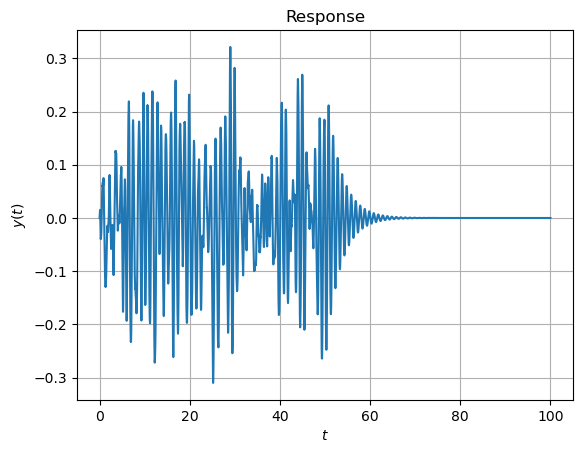

In [21]:
import numpy as np
from matplotlib import pyplot as plt

# structural properties
m = 100
omega_n = 1*2*np.pi
zeta = 5/100

t = np.linspace(0,100,10001)
omega_D = np.sqrt(1-zeta**2)*omega_n

ks = m*omega_n**2 

c = 2*m*zeta*omega_n

h = np.exp(-zeta*omega_n*t)*1/omega_D/m*np.sin(omega_D*t)

y_imp = np.zeros(t.shape[0])

x = 1000*np.random.randn(len(t))
x[t>50] = 0

for k in range(len(t)):
    y_imp[k] = np.trapz(np.flip(h[0:k+1])*x[0:k+1],t[0:k+1])

plt.figure()
plt.plot(t,y_imp)
plt.grid()
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.title("Response");

d) Derive the frequency response method and make a python script that solves the dynamic response by the impulse response method using FFT. 

#### Solution

To derive the frequency-response-method we assume that the load is harmonic with unit amplitude $x(t) = e^{i\omega t}$. We further assume that the particular solution takes the form $y=H(\omega)e^{i \omega t}$

inserting the particular solution into the equation of motion renders

$$ \left(-\omega^2 m + i \omega c  + k\right)H(\omega)e^{i\omega t} = e^{i\omega t} $$

The frequency response function of the system is

$$ H(\omega) = \frac{1}{\left(-\omega^2 m + i \omega c  + k\right)} $$

The frequency response method can be summarized in the following manner.

1) Take the Fourier transform of the load ( Approximate by using a Fourier series)
    
2) Multiply the Fourier transform of the load with the frequency response function to get the Fourier transform of the response

3) Obtain the response by taking the inverse Fourier transform of the Fourier transform of the response

It is important to remember that following the above procedure assumes that the loading is periodic. It is, therefore, necessary to ensure that the load is zero for a sufficiently long time at the end of the time series to ensure that the response has time to settle to zero. Any remaining response at the end of the calculated time series will be introduced as initial conditions and will, therefore, reduce the accuracy of the solution significantly. 



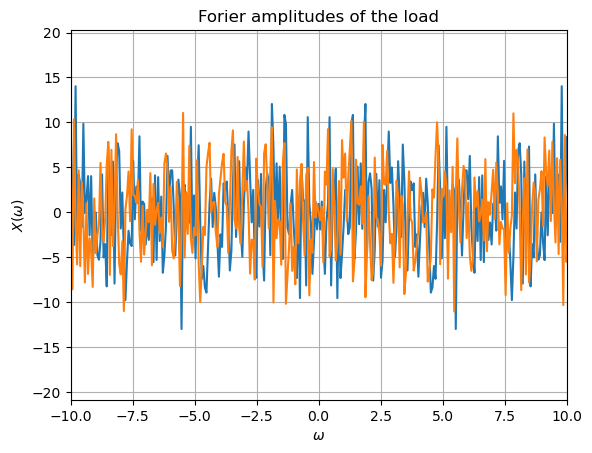

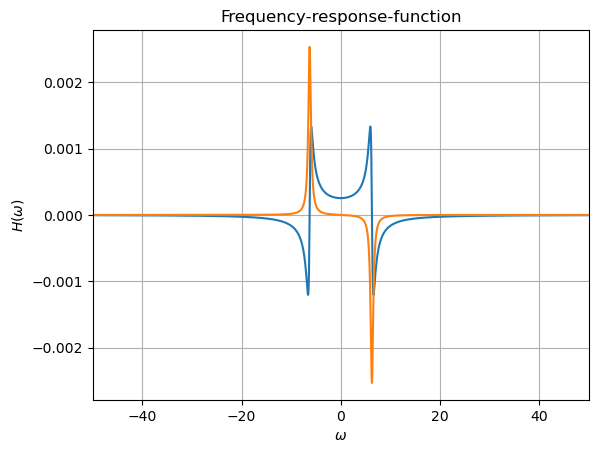

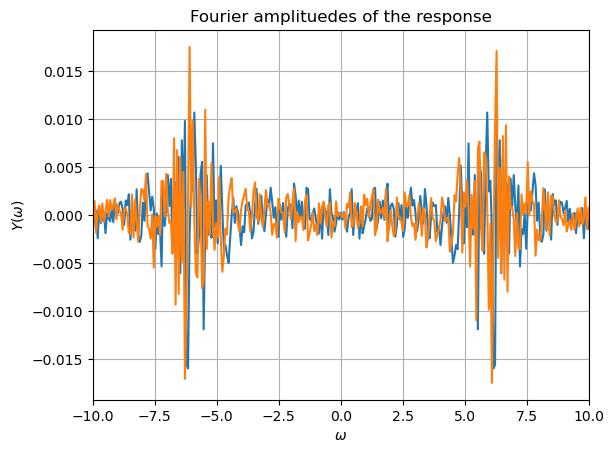

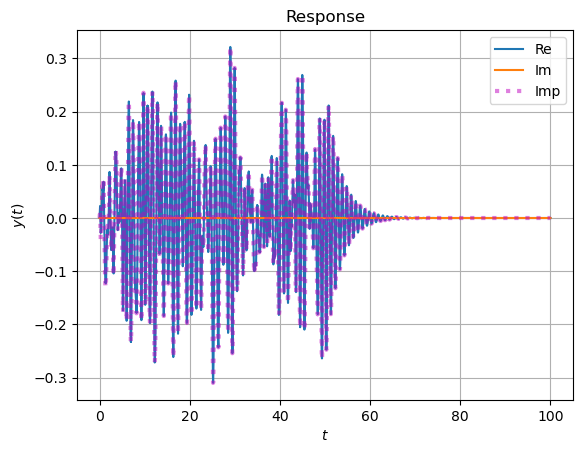

In [22]:
# Step 1: Obtain the fft of the load
x_fft = np.fft.fft(x)/x.shape[0] # Fourier coefficients by fft (Divide by N since it is not included in NumPy)
x_fft = np.fft.fftshift(x_fft) # Shift the amplitudes such that negative frequencies comes first, then mean, then positive
Npoints = t.shape[0] # Npoints in the time series 
fs = 1.0/(t[1]-t[0]) # Sampling frequency
f = np.linspace(-fs/2,fs/2,Npoints) # Frequency axis. From negative to positive Nyquist frequency
w = 2*np.pi*f # Frequency in rad/s

# Step 2: Obtain Fourier amplitudes of the response 
H = 1/(-w**2*m +1j*w*c + ks) 
Y = H*x_fft 

# Step 3: obtain the response by taking the inverse Forier transform
Ys = np.fft.ifftshift(Y)*t.shape[0] # We need to shift the amplitudes to match the definition in NumPy.
y_frm = np.fft.ifft(Ys) # The response by ifft.

# Plot Fourier amplitudes of the load.
plt.figure()
plt.plot(w,np.real(x_fft))
plt.plot(w,np.imag(x_fft))
plt.xlim(-10,10)
plt.ylabel(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.title("Forier amplitudes of the load")
plt.grid()

#Plot the frequency-response
plt.figure()
plt.plot(w,np.real(H),label = "Re")
plt.plot(w,np.imag(H),label = "Im")
plt.grid()
plt.xlim(-50,50)
plt.ylabel("$H(\omega)$")
plt.xlabel("$\omega$")
plt.title("Frequency-response-function")

# Plot Fourier amplitudes of the response
plt.figure()
plt.plot(w,np.real(Y))
plt.plot(w,np.imag(Y))
plt.ylabel(r'$Y(\omega)$')
plt.xlabel(r'$\omega$')
plt.xlim(-10,10)
plt.grid()
plt.title("Fourier amplituedes of the response")

# Plot the response
plt.figure()
plt.plot(t,np.real(y_frm),label = 'Re')
plt.plot(t,np.imag(y_frm), label = 'Im')
plt.plot(t,y_imp,":", label = 'Imp',alpha=0.5, color='m', linewidth=3)
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend();
plt.title("Response");

e) Compare the computational speed of the impulse-response and the frequency-response methods

#### Solution

The frequency-response method is many times faster than the impulse-response method. This is why many codes solve convolution integrals by multiplication in the frequency domain instead of solving integrals many times in a loop.

### Problem 2: Transmission of random vibrations

Consider the multi-degree of freedom system subjected to stochastic loads defined by the following equation. 

$$ \mathbf{M} \ddot{\mathbf{y}} + \mathbf{C} \dot{\mathbf{y}}+ \mathbf{K} \mathbf{y} = \mathbf{X}(t) $$

Start by defining the cross-correlation matrix of the response and show that the cross-spectral density matrix of the response can be expressed as 

$$ \mathbf{S_y}(\omega) = \bar{\mathbf{H}}(\omega) \mathbf{S_x}(\omega)    \mathbf{H}^T(\omega) $$

#### Solution

The cross-correlation matrix of the response is defined by

$$ \mathbf{R_y}(\tau) = E \left[ \mathbf{y}(t) \mathbf{y}^T(t+\tau)  \right]  $$

The response is calculated using the impulse response method.

$$\mathbf{y}(t) = \int_{-\infty}^{\infty} \mathbf{h}(\theta_1) \mathbf{x}(t-\theta_1)d\theta_1   $$

$$\mathbf{y}(t+\tau) = \int_{-\infty}^{\infty} \mathbf{h}(\theta_2) \mathbf{x}(t+\tau-\theta_2)d\theta_2   $$

Inserting the convolution integrals into the definition of the cross-correlation matrix

$$ \mathbf{R_y}(\tau) = E \left[ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) \mathbf{x}(t-\theta_1) \mathbf{x}^T(t+\tau-\theta_2)\mathbf{h}^T(\theta_2)d\theta_1  d\theta_2  \right]  $$

$$ \mathbf{R_y}(\tau) =  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) E \left[ \mathbf{x}(t-\theta_1) \mathbf{x}^T(t+\tau-\theta_2) \right]\mathbf{h}^T(\theta_2)   d\theta_1  d\theta_2  $$

$$ \mathbf{R_y}(\tau) =  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) \mathbf{R_x}(\tau-\theta_2+\theta_1)\mathbf{h}^T(\theta_2)   d\theta_1  d\theta_2  $$

The cross-spectral density matrix is obtained by taking the Fourier transform.

$$ \mathbf{S_y}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) \mathbf{R_x}(\tau-\theta_2+\theta_1)\mathbf{h}^T(\theta_2)   d\theta_1  d\theta_2 e^{-i\omega\tau}d\tau  $$

We introduce the variable 

$$\gamma=\tau-\theta_2+\theta_1$$. 

We can then define the following relations 
$$\frac{d\gamma}{d\tau}=1$$ 

$$d\gamma=d\tau$$ 

$$\gamma=\tau-\theta_2+\theta_1$$ 

$$\tau = \gamma+\theta_2-\theta_1$$

$$ \mathbf{S_y}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) \mathbf{R_x}(\tau-\theta_2+\theta_1)\mathbf{h}^T(\theta_2)   d\theta_1  d\theta_2 e^{-i\omega\tau}d\tau  $$

$$ \mathbf{S_y}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \mathbf{h}(\theta_1) \mathbf{R_x}(\gamma)\mathbf{h}^T(\theta_2)   d\theta_1  d\theta_2 e^{-i\omega \left( \gamma+\theta_2-\theta_1 \right)}d\gamma  $$

$$ \mathbf{S_y}(\omega) =  \int_{-\infty}^{\infty} \mathbf{h}(\theta_1) e^{i\omega\theta_1}d\theta_1   \frac{1}{2\pi} \int_{-\infty}^{\infty}   \mathbf{R_x}(\gamma) e^{-i\omega \gamma}  d\gamma \int_{-\infty}^{\infty}  \mathbf{h}^T(\theta_2)    e^{-i\omega\theta_2}  d\theta_2  $$

The following relations can be introduced. 

$$\bar{\mathbf{H}}(\omega) =  \int_{-\infty}^{\infty} \mathbf{h}(\theta_1) e^{i\omega\theta_1}d\theta_1  $$

$$ \mathbf{S_x}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty}   \mathbf{R_x}(\gamma) e^{-i\omega \gamma}  d\gamma   $$

$$\mathbf{H}^T(\omega) =  \int_{-\infty}^{\infty} \mathbf{h}^T(\theta_1) e^{-i\omega\theta_1}d\theta_2  $$

This results in the expression for the cross-spectral density matrix of the response.

$$ \mathbf{S_y}(\omega) = \bar{\mathbf{H}}(\omega) \mathbf{S_x}(\omega)\mathbf{H}^T(\omega) $$




### Problem 3: A tuned mass damper

The figure below shows a large mass supported by a spring and a dashpot damper. A tuned mass damper that consists of a smaller mass, a spring and a dashpot damper has been put at the top of the large mass. 

The properties of the dynamic system are defined as follows.

$m_1 = 1000$, $m_2 = 50$

$k_1 = (2\pi f_1)^2 m_1$,  $k_2 = (2\pi f_2)^2$ 

$c_1 = 2 m_1 \omega_1 \zeta_1$, $c_2 = 2 m_2 \omega_2 \zeta_2$. 

The large mass is subjected to white noise $S_x(\omega) = W_0$

Assume that $f_1=5$, $f_2 = 4.9$, $\zeta_1 = 0.5 \%$ and $\zeta_2 = 5 \%$

Also, note that the natural frequencies and damping ratios above are for the two **independent** systems.


<img src="mass with tmd.svg">

#### Soultion

a) Obtain the equations of motion for the dynamic system **with** and **without** the TMD


The equation of motion for the system **Without** the TMD is defined as

$$m_1 \ddot{y} + c_1 \dot{y} + k_1 y = X1 $$

The equation of motion for the system **With** the TMD is defined as

$$ \left[ \begin{array} {c c}  m_1 & 0  \\ 0 & m_2 \end{array} \right]  \left[ \begin{array} {c}  \ddot{y}_1  \\ \ddot{y}_2 \end{array} \right]  +
 \left[ \begin{array} {c c}  c_1+c_2 & -c_2  \\ -c_2 & c_2 \end{array} \right]  \left[ \begin{array} {c}  \dot{y}_1  \\ \dot{y}_2 \end{array} \right] +
  \left[ \begin{array} {c c}  k_1+k_2 & -k_2  \\ -k_2 & k_2 \end{array} \right]  \left[ \begin{array} {c}  y_1  \\ y_2 \end{array} \right]+
 \left[ \begin{array} {c}  X_1  \\ 0 \end{array}\right]  $$

b) Calculate the system's dynamic response **with** and **without** the TMD using Newmark's method, compare the standard deviations and comment on the results. Is the TMD working well or not?  

#### Solution

Load necessary modules and use Monte Carlo simulations to generate realizations of the load

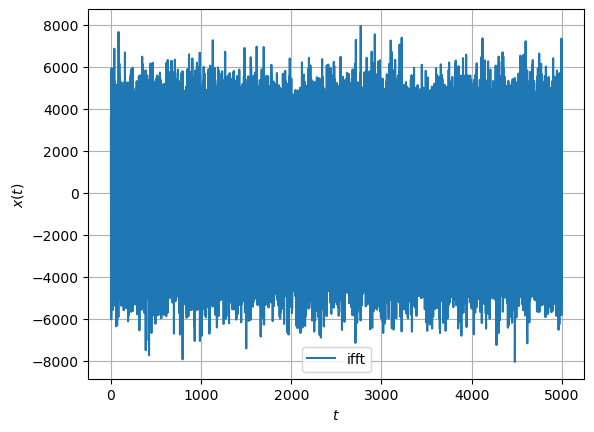

In [23]:
from matplotlib import pyplot as plt
import sys
sys.path.append(r"C:\Cloud\OD_OWP\Work\Python\Github\TKT4108StructuralDynamics2\python\modules")
from time_integration import * # Import all functions in the module time_integration

#Monte Carlo simulation of loads
dw = 1.0e-3
w = np.arange(dw,50*2*np.pi,dw)
phi = np.random.rand(len(w))*2*np.pi
W0 = 10000
Sx = np.ones(len(w))*W0

c = (2*Sx*dw)**0.5*np.exp(1j*phi) # The complex amplitude inclusing the phase angle
xifft = np.real(np.fft.ifft(c)*w.shape[0]) # The ifft
tifft = np.linspace(0,2*np.pi/dw,w.shape[0]) # time axis

# Cut time series to 5000 s
x = xifft[tifft<5000]
t = tifft[tifft<5000]

X = np.zeros((2,len(t)))

X[0,:] = x

plt.figure()
plt.plot(t,x,label = 'ifft')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend();




Standard deviation of response with TMD 0.004105094707866101
Standard deviation of response without TMD 0.013477874213255749


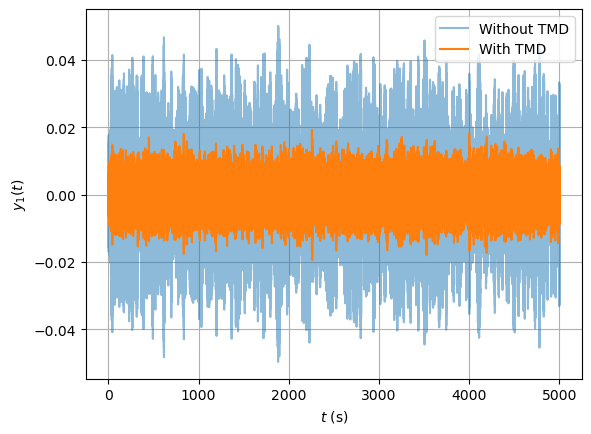

In [24]:
f1 = 5
f2 = 4.9

zeta1 = 0.5/100
zeta2 = 5.0/100


m1 = 1000
m2 = 50

k1= (2*np.pi*f1)**2*m1
k2 = (2*np.pi*f2)**2*m2

c1 = 2*zeta1*(np.pi*f1)*m1
c2 = 2*zeta2*(np.pi*f2)*m2

MM = np.array([[m1, 0],[0,m2]])
CC = np.array([[c1+c2, -c2],[-c2,c2]])
KK = np.array([[k1+k2, -k2],[-k2,k2]])

u0 = np.zeros((2,1))
udot0 = np.zeros((2,1))

gamma = 1/2
beta = 1/4

h = t[1]-t[0]

y2dof, _, _ = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)
y1dof, _, _ = linear_newmark_krenk(np.array([[m1]]),np.array([[c1]]),np.array([[k1]]),np.array([X[0,:]]),np.array([[0]]),np.array([[0]]),h,gamma,beta)

plt.figure()
plt.plot(t,y1dof[0,:],alpha=0.5,label="Without TMD")
plt.plot(t,y2dof[0,:],label="With TMD")
plt.legend()
plt.grid()
plt.ylabel("$y_{1}(t)$")
plt.xlabel("$t$ (s)")

print("Standard deviation of response with TMD " + str(np.std(y2dof[0,:])))
print("Standard deviation of response without TMD " + str(np.std(y1dof[0,:])))

c) Plot the frequency response function for the system **without** TMD and the frequency response $H_{11}(\omega)$ for the system **with** TMD. Comment on the results

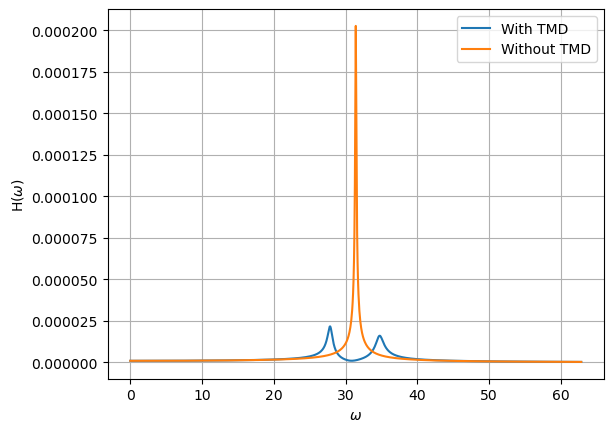

In [25]:
w = np.linspace(0,10*2*np.pi,1001)
HH = np.zeros((2,2,len(w)),dtype="complex")
for k in range(len(w)):
    HH[:,:,k] = np.linalg.inv(-w[k]**2*MM + 1j*w[k]*CC + KK)

H1dof = 1/(-w**2*m1 + 1j*w*c1 + k1) 
    
plt.figure()
plt.plot(w,np.abs(HH[0,0,:]),label="With TMD")
plt.plot(w,np.abs(H1dof),label="Without TMD")
plt.grid()
plt.legend()
plt.ylabel("H($\omega$)")
plt.xlabel("$\omega$");

d) Due to fabrication errors, it turns out that the stiffness of the spring in the TMD is 30 per cent lower than specified in the order $k_2 = 0.7\cdot(2\pi f_2)^2$. The properties of the damper and the mass of the TMD are accurate.  
Make new dynamic response calculations and compare them to the results obtained earlier. Comment on the discrepancies that you observe

#### Solution

Standard deviation of response with TMD is 5.88e-03
Standard deviation of response without TMD is 1.35e-02


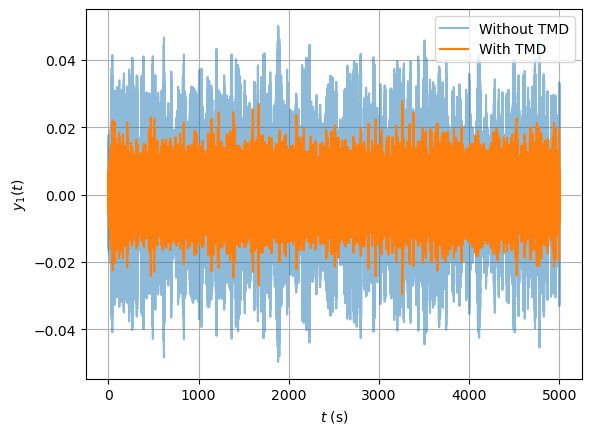

In [26]:

k2 = 0.7*(2*np.pi*f2)**2*m2

KK = np.array([[k1+k2, -k2],[-k2,k2]])

u0 = np.zeros((2,1))
udot0 = np.zeros((2,1))

gamma = 1/2
beta = 1/4

z2dof, _, _ = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)
z1dof, _, _ = linear_newmark_krenk(np.array([[m1]]),np.array([[c1]]),np.array([[k1]]),np.array([X[0,:]]),np.array([[0]]),np.array([[0]]),h,gamma,beta)

plt.figure()
plt.plot(t,z1dof[0,:],alpha=0.5,label="Without TMD")
plt.plot(t,z2dof[0,:],label="With TMD")
plt.legend()
plt.grid()
plt.ylabel("$y_{1}(t)$")
plt.xlabel("$t$ (s)")

print("Standard deviation of response with TMD is " + '{:.2e}'.format(np.std(z2dof[0,:])))
print("Standard deviation of response without TMD is " + '{:.2e}'.format(np.std(z1dof[0,:])))

e) Plot the frequency response function of the single degree of freedom system without the TMD and $H_{11}(\omega)$ for the system with the TMD considering the wrong spring stiffness. Discuss how these plots are related to the results you presented in problem c)

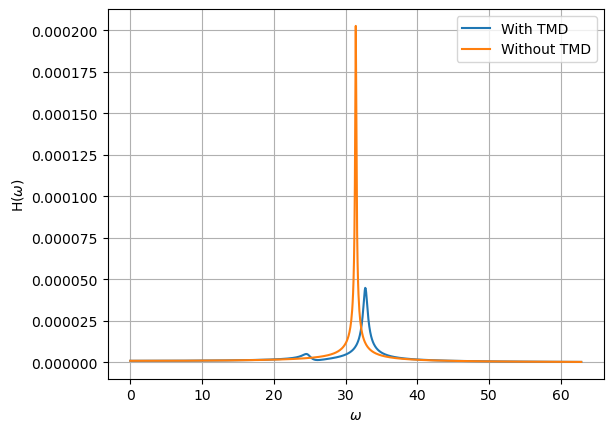

In [27]:
w = np.linspace(0,10*2*np.pi,1001)
HH = np.zeros((2,2,len(w)),dtype="complex")
for k in range(len(w)):
    HH[:,:,k] = np.linalg.inv(-w[k]**2*MM + 1j*w[k]*CC + KK)

H1dof = 1/(-w**2*m1 + 1j*w*c1 + k1) 

plt.figure()
plt.plot(w,np.abs(HH[0,0,:]),label="With TMD")
plt.plot(w,np.abs(H1dof),label="Without TMD")
plt.grid()
plt.legend()
plt.ylabel("H($\omega$)")
plt.xlabel("$\omega$");

f) Calculate the cross-spectral density matrix of the response using the expression from problem 2. Comment on how well the results correspond to the time domain simulations.

Standard deviation of response with TMD is 6.25e-03
Standard deviation of response without TMD is 1.42e-02


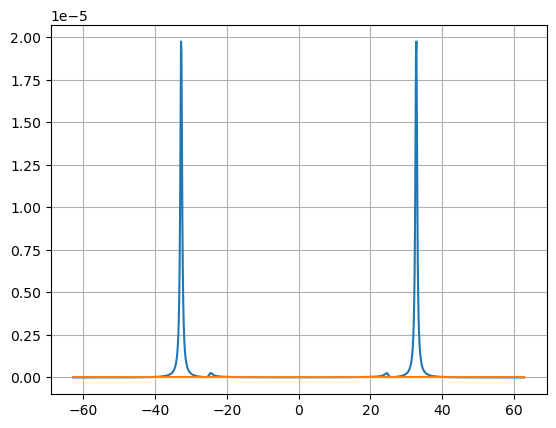

In [31]:
#k2 = 1.0*(2*np.pi*f2)**2*m2
w = np.linspace(-10*2*np.pi,10*2*np.pi,1001)
#KK = np.array([[k1+k2, -k2],[-k2,k2]])

S0 = 10000
SQSQ = np.zeros((2,2,len(w)))
SQSQ[0,0,:] = 1.0*S0
SQSQ[1,1,:] = 0.0

HH = np.zeros((2,2,len(w)),dtype="complex")
for k in range(len(w)):
    HH[:,:,k] = np.linalg.inv(-w[k]**2*MM + 1j*w[k]*CC + KK)

SSy = np.zeros((2,2,len(w)),dtype=complex)
for k in range(len(w)):
    SSy[:,:,k] = np.conj(HH[:,:,k]) @ SQSQ[:,:,k] @ HH[:,:,k].T

#1-dof system
Sy_1dof = np.conj(H1dof)*S0*H1dof

plt.figure()
plt.plot(w,np.real(SSy[0,0,:]),label="Re With TMD")
plt.plot(w,np.imag(SSy[0,0,:]),label="Im With TMD")
#plt.plot(w,np.real(Sy_1dof))
plt.grid()
plt

std_wTMD = np.real(np.trapz(SSy[0,0,:],w))**0.5
std_woTMD = np.real(np.trapz(Sy_1dof,w))**0.5

print("Standard deviation of response with TMD is " + '{:.2e}'.format(std_wTMD) )
print("Standard deviation of response without TMD is " + '{:.2e}'.format(std_woTMD) )

